# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import csv
import matplotlib.image as mpimg

%matplotlib inline

### Load relevant data

Bathymetry:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [3]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [4]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Show sub-domain in detail with the grid:

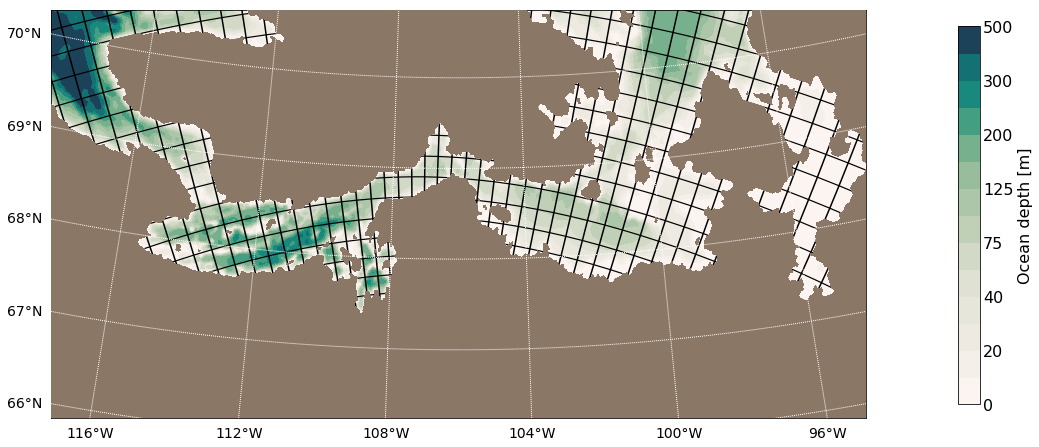

In [63]:
fig,ax = plt.subplots(figsize=(15,7.5))

proj=Basemap(projection='eqdc',lat_0 = 68.5, lon_0 = -106, resolution='i', width=1.0e6, height=0.50e6)
proj.drawparallels(np.arange(int(65),int(90),1),labels=[1,0,0,0], linewidth=1.0, color='w', fontsize=14, zorder=4)
proj.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=1.0, color='w', fontsize=14, zorder=4)

# bathymetry:
clevels=[0, 10, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 350, 500]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=3)

x=x_mesh
y=y_mesh
res=10

proj.plot(x[::res,::res], y[::res,::res], 'k-', lw=1.2, zorder=2)
proj.plot(x[::res,::res].T, y[::res,::res].T, 'k-', lw=1.5, zorder=2)

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

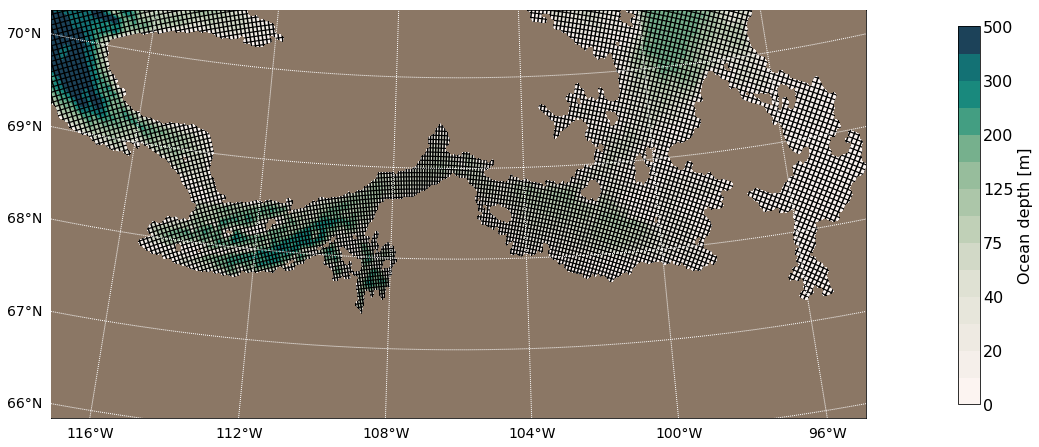

In [66]:
fig,ax = plt.subplots(figsize=(15,7.5))

proj=Basemap(projection='eqdc',lat_0 = 68.5, lon_0 = -106, resolution='i', width=1.0e6, height=0.50e6)
proj.drawparallels(np.arange(int(65),int(90),1),labels=[1,0,0,0], linewidth=1.0, color='w', fontsize=14, zorder=4)
proj.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=1.0, color='w', fontsize=14, zorder=4)

# bathymetry:
clevels=[0, 10, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 350, 500]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=3)

x=x_mesh
y=y_mesh
res=2

proj.plot(x[::res,::res], y[::res,::res], 'k-', lw=1.2, zorder=2)
proj.plot(x[::res,::res].T, y[::res,::res].T, 'k-', lw=1.5, zorder=2)

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)